# Testing Conversion of frame rates to a constant time.

# `12FPS -> 30FPS Challenge`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Below Example has 12fps (person_18_class_10)

In [54]:
df = pd.read_csv("videos_fold_1/csv_data_output/data_person_18_class_10.csv").drop(columns=['Unnamed: 0']) # , index_col='time_derived_from_fps'
df.head(15)

,left_eye_aperture_measurements,right_eye_aperture_measurements,mouth_top_bottom_aperture_measurements,mouth_left_right_aperture_measurements,time_derived_from_fps
0,0.022738,0.021715,0.062744,0.085845,0.000000
1,0.019059,0.018681,0.061304,0.086442,0.083333
2,0.019362,0.019064,0.062805,0.087127,0.166667
3,0.019191,0.018790,0.062250,0.087076,0.250000
4,0.019235,0.018868,0.062072,0.087034,0.333333
5,0.019339,0.019017,0.062839,0.086844,0.416667
6,0.019647,0.019354,0.062735,0.086486,0.500000
7,0.019396,0.019027,0.062859,0.087333,0.583333
8,0.019071,0.018798,0.063565,0.087215,0.666667
9,0.019229,0.018840,0.062246,0.087484,0.750000


In [8]:
# df.set_index('time_derived_from_fps', inplace=True)
# df.plot()

In [61]:
test_df =  df[['time_derived_from_fps', 'left_eye_aperture_measurements']].copy()
test_df.head(14)

,time_derived_from_fps,left_eye_aperture_measurements
0,0.000000,0.022738
1,0.083333,0.019059
2,0.166667,0.019362
3,0.250000,0.019191
4,0.333333,0.019235
5,0.416667,0.019339
6,0.500000,0.019647
7,0.583333,0.019396
8,0.666667,0.019071
9,0.750000,0.019229


In [11]:
test_df_time_index = test_df.set_index('time_derived_from_fps')

## Time vs. Left Eye Aperture 6 frames (0.5 seconds)

<Axes: xlabel='time_derived_from_fps'>

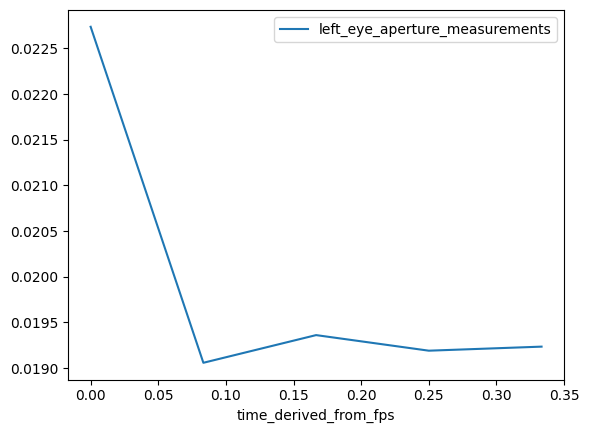

In [30]:
test_df_time_index.iloc[0:5].plot()

In [38]:
upsampling_framerate(test_df, 30)

original time [0.0, 0.0833333333333333, 0.1666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666667, 1.25, 1.3333333333333333, 1.4166666666666667, 1.5, 1.5833333333333333, 1.6666666666666667, 1.75, 1.8333333333333333, 1.9166666666666667, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.8333333333333335, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666667, 4.25, 4.333333333333333, 4.416666666666667, 4.5, 4.583333333333333, 4.666666666666667, 4.75, 4.833333333333333, 4.916666666666667, 5.0, 5.083333333333333, 5.166666666666667, 5.25, 5.333333333333333, 5.416666666666667, 5.5

In [ ]:
def upsampling_framerate(df, new_framerate):
    """
    Input dataframe must be a LOWER framerate as the new_framerate. Otherwise, use the downsampling_framerate function!
    This function will return a dataframe with the original data linearly interpolated to the new framerate.
    """

    # Input Validation
    assert new_framerate > 0, "New frame rate must be greater than 0."
    
    # Extract original dataframe time as a list, then derive framerate, then determine how many frames there are.
    original_time_list = df.loc[:, 'time_derived_from_fps'].tolist()  
    original_fps_derived = round(1/(original_time_list[1] - original_time_list[0]), 2) #consider original_fps_derived rounding as an input variable.
    original_time_list_length = len(original_time_list)

    assert new_framerate > original_fps_derived, "New frame rate must be greater than the input framerate."

    # Generate time value array for next dataframe.
    duration = 600  # 600s = 10 minutes
    new_time_list = [(i / new_framerate) for i in range(0, int(new_framerate * duration) + 1)] # 18,000 rows for a 10 minute 30fps video.
   
    # Print statements to check values
    # print("original time list", original_time_list)
    # print("")
    # print("original fps derived", original_fps_derived) 
    # print("")
    # print("new time list", new_time_list)

    # Begin interpolation
    new_measurements = []
    for new_time_index in range(len(new_time_list)): 
        t = new_time_list[new_time_index]
        original_index_lower = df[df['time_derived_from_fps'] <= t]['time_derived_from_fps'].idxmax()
        original_index_upper = df[df['time_derived_from_fps'] > t]['time_derived_from_fps'].idxmax()
        original_time_lower = df.loc[original_index_lower, 'time_derived_from_fps']
        original_time_upper = df.loc[original_index_upper, 'time_derived_from_fps']
        original_measurement_lower = df.loc[original_index_lower, 'left_eye_aperture_measurements']
        original_measurement_upper = df.loc[original_index_upper, 'left_eye_aperture_measurements']
        interpolation = original_measurement_lower + (((t - original_time_lower)*(original_measurement_upper - original_measurement_lower))/(original_time_upper - original_time_lower))
        new_measurements.append(interpolation)

    new_df_dict = {'left_eye_aperture_measurements_new_fps': new_measurements}
    new_df = pd.DataFrame(new_df_dict)
    return new_df
    

In [49]:
y = upsampling_framerate(test_df, 30)

<Axes: >

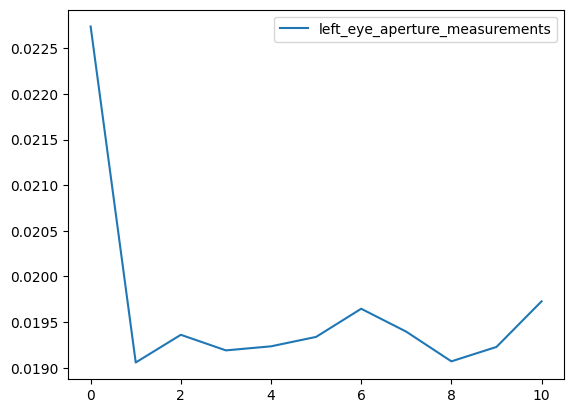

In [56]:
df.loc[0:10, ['left_eye_aperture_measurements']].plot()

<Axes: >

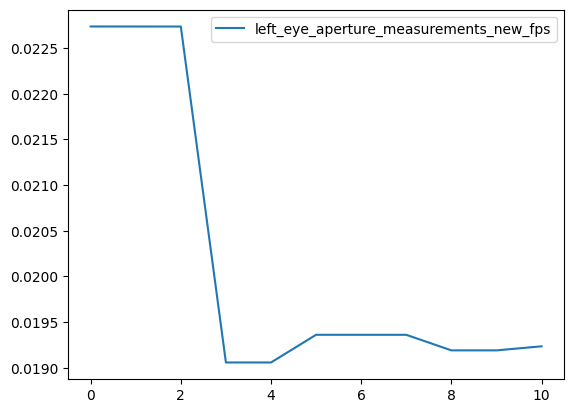

In [58]:
y.loc[0:10, ['left_eye_aperture_measurements_new_fps']].plot()

In [73]:
import numpy as np
import pandas as pd

def upsampling_framerate2(df, new_framerate):
    """
    Input dataframe must be a LOWER framerate as the new_framerate. Otherwise, use the downsampling_framerate function!
    This function will return a dataframe with the original data linearly interpolated to the new framerate.
    """
    # Extract original dataframe time and measurement values as arrays
    original_time_list = df['time_derived_from_fps'].values
    original_measurement_values = df['left_eye_aperture_measurements'].values
    
    # Calculate original frame rate
    original_fps_derived = round(1 / (original_time_list[1] - original_time_list[0]), 2)
    
    # Generate time values for the new DataFrame
    duration = 600  # 600s = 10 minutes
    new_time_list = np.arange(0, duration + 1 / new_framerate, 1 / new_framerate)
   
    # Precompute the indices for original_time_list where each new_time_list value falls
    original_indices_lower = np.searchsorted(original_time_list, new_time_list, side='right') - 1
    original_indices_upper = original_indices_lower + 1
    
    # Perform linear interpolation
    new_measurements = (original_measurement_values[original_indices_upper] * (new_time_list - original_time_list[original_indices_lower]) +
                        original_measurement_values[original_indices_lower] * (original_time_list[original_indices_upper] - new_time_list)) / \
                       (original_time_list[original_indices_upper] - original_time_list[original_indices_lower])

    # Create a new DataFrame with the interpolated measurements
    new_df = pd.DataFrame({'time_derived_from_fps': new_time_list, 'left_eye_aperture_measurements_new_fps': new_measurements})
    
    return new_df

# Example usage:
new_df = upsampling_framerate2(test_df, 50)
new_df.head(10)

,time_derived_from_fps,left_eye_aperture_measurements_new_fps
0,0.00,0.022738
1,0.02,0.021855
2,0.04,0.020972
3,0.06,0.020089
4,0.08,0.019206
5,0.10,0.019119
6,0.12,0.019192
7,0.14,0.019265
8,0.16,0.019337
9,0.18,0.019334


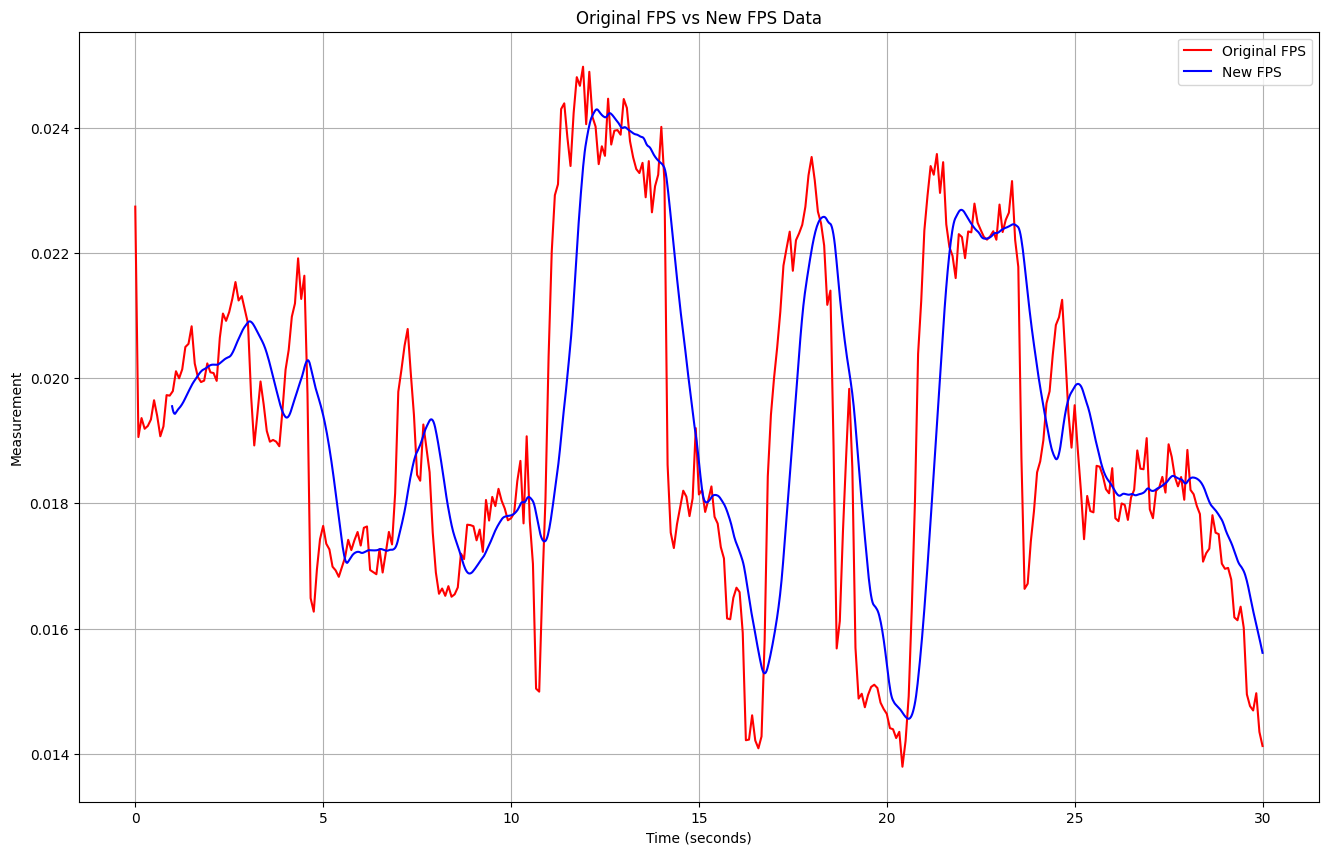

In [86]:
import matplotlib.pyplot as plt

def plot_original_vs_new(original_df, new_df, duration=20):
    """
    Plot the first 'duration' seconds of the original and new FPS dataframes on the same chart.
    """
    # Filter the data for the specified duration
    original_df = original_df[original_df['time_derived_from_fps'] <= duration]
    new_df = new_df[new_df['time_derived_from_fps'] <= duration]

    # Create a plot
    plt.figure(figsize=(16, 10))
    plt.plot(original_df['time_derived_from_fps'], original_df['left_eye_aperture_measurements'], label='Original FPS', color='red')
    plt.plot(new_df['time_derived_from_fps'], new_df['left_eye_aperture_measurements_new_fps'], label='New FPS', color='blue')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Measurement')
    plt.title('Original FPS vs New FPS Data')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example usage:
plot_original_vs_new(test_df, smoothed_df, duration=30)

In [85]:
def smooth_data(df, window_size):
    """
    Smooth the data in the DataFrame using a rolling average with the specified window size.
    """
    smoothed_df = df.copy()
    columns_to_smooth = ['left_eye_aperture_measurements_new_fps']

    for column in columns_to_smooth:
        smoothed_df[column] = df[column].rolling(window=window_size).mean()

    return smoothed_df

# Example usage:
smoothed_df = smooth_data(new_df, window_size=50)  # Adjust the window size as needed
